<a href="https://colab.research.google.com/github/evelindna/sprint-analise-boaspraticas-pucrio/blob/main/sprint_analise_dados/MPV_AnaliseDados_EvelinDallaNora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Evelin Dalla Nora de Almeida

**Matrícula:** 4052025000854

**Dataset:** [Cafe Sales](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training)


# Definição do Problema  

O Cafe Sales Dataset é um conjunto de dados de transações de vendas em um café. O objetivo principal é fornecer um cenário realista para limpeza de dados e análise exploratória de dados (EDA). Será usado para praticar técnicas de limpeza, manipulação de dados e engenharia de recursos.

## Hipóteses do Problema

Tracei as seguintes hipóteses:


*   O Cafe possui pelo menos 50% das vendas presenciais na loja?
*   Majoritariamente é comprado bebidas líquidas ao invés de lanches?
*   É possível prever a demanda do café para o mês seguinte?

Como um acréscimo acho válido inserir uma análise do negócio, extraindo insights relevantes para o desenvolvimento da empresa.


## Tipo de Problema  

Este é um tipo de **análise descritiva** podendo ser feita uma análise **preditiva** através da resolução do **problema de previsão de demanda**, utilizando **séries temporais** para prever a demanda de vendas do café, sendo este um **problema de aprendizado supervisionado**

## Seleção dos dados

Os dados foram selecionados no repositório **Kaggle**. Foi realizada uma busca e priorizado casos em que o dataset precisasse de grande limpeza e como segunda prioridade foi que o dataset fosse possível extrair insights para impulsionar o negócio.

## Atributos do Dataset

| Nome da Coluna | Descição | Valores de Exemplo |
|-------------|-------------|-------------|
| Transaction ID| Identificador único para cada transação | TXN_1234567 |
| Item | Nome do item comprado | Coffee, Sandwich |
| Quantity | Quantidade do item comprado | 1, 3 |
| Price Per Unit | Preço de uma unidade do item | 2.00, 4.00 |
| Total Spent | Valor total gasto na transação, calculado pela *Quantity* * *Price Per Unit* | 8.00, 12.00 |
| Payment Method | Metodo de pagamento usado | Cash, Credit |
| Location | Localização onde a transação ocorreu | In-store, Takeaway |
| Transaction Date | Data da transação | 2023-01-01 |




# Biliotecas & Funções

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
from scipy import stats
from sklearn.model_selection import TimeSeriesSplit

pd.set_option('display.max_columns', None)

# Análise de Dados  
O objetivo desta sessão é entender a informação disponível, sua distribuição e características.

Link do repositório: [Pós Graduação em Data Science & Analytics | PUCRIO](https://github.com/evelindna/sprint-analise-boaspraticas-pucrio)

In [ ]:
url = "https://raw.githubusercontent.com/evelindna/sprint-analise-boaspraticas-pucrio/refs/heads/main/dirty_cafe_sales.csv"

df_original = pd.read_csv(url)
df = df_original.copy()

In [ ]:
print(f"O dataset possui {len(df)} instâncias e {len(df.columns)} atributos")
print("---------------------------------")
print(f"Os atributos são: ")
for x in df.columns: print(x)
print("---------------------------------")
print("Os tipos de coluna são: ")
df.dtypes

O dataset possui 10000 instâncias e 8 atributos
---------------------------------
Os atributos são: 
Transaction ID
Item
Quantity
Price Per Unit
Total Spent
Payment Method
Location
Transaction Date
---------------------------------
Os tipos de coluna são: 


,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


In [ ]:
# Convertendo para o formato adequado
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [ ]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
for x in df.columns:
  print(f"Quantidade de nulos na coluna {x}: {sum(df[x].isna())}")

Quantidade de nulos na coluna Transaction ID: 0
Quantidade de nulos na coluna Item: 333
Quantidade de nulos na coluna Quantity: 479
Quantidade de nulos na coluna Price Per Unit: 533
Quantidade de nulos na coluna Total Spent: 502
Quantidade de nulos na coluna Payment Method: 2579
Quantidade de nulos na coluna Location: 3265
Quantidade de nulos na coluna Transaction Date: 159


In [ ]:
#Criando uma lista com as colunas numéricas para a iteração da célula abaixo
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
print(colunas_numericas)

['Quantity', 'Price Per Unit', 'Total Spent']


In [ ]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.949984,8.924352
std,1.419007,1.278450,6.009919
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [ ]:
# mínimo, máximo, mediana, moda, média, desvio-padrão
for coluna in colunas_numericas:
  dados = df[coluna].dropna()
  moda = stats.mode(dados, keepdims=True)[0]
  moda = moda[0] if len(moda) > 0 else np.nan

  print(f"""Resumo estatístico referente a coluna {coluna}: \n Mínimo: {np.nanmin(df[coluna])}\n Máximo: {np.nanmax(df[coluna])}\n Mediana: {np.nanmedian(df[coluna])}\n Moda: {moda}
 Média: {round(np.nanmean(df[coluna]), 2)}
 Desvio Padrão: {round(np.nanstd(df[coluna], ddof=1), 2)}""")

print("\nOs números não possuem uma distribuição muito grande, se mantendo na grandeza de 1 a 5. Exceto para a coluna Total Spent que temos uma distribuição maior com uma média de 8,92 e um desvio padrão de 6.")

Resumo estatístico referente a coluna Quantity: 
 Mínimo: 1.0
 Máximo: 5.0
 Mediana: 3.0
 Moda: 5.0
 Média: 3.03
 Desvio Padrão: 1.42
Resumo estatístico referente a coluna Price Per Unit: 
 Mínimo: 1.0
 Máximo: 5.0
 Mediana: 3.0
 Moda: 3.0
 Média: 2.95
 Desvio Padrão: 1.28
Resumo estatístico referente a coluna Total Spent: 
 Mínimo: 1.0
 Máximo: 25.0
 Mediana: 8.0
 Moda: 6.0
 Média: 8.92
 Desvio Padrão: 6.01

Os números não possuem uma distribuição muito grande, se mantendo na grandeza de 1 a 5. Exceto para a coluna Total Spent que temos uma distribuição maior com uma média de 8,92 e um desvio padrão de 6.


A partir das correlações abaixo é possível enxergar a existência de erros na base de dados, que serão tratados na etapa seguinte,
também é possível evidenciar que nem todos os itens vendem em maiores quantidades (>4un), então é um ponto para trabalhar.
O total gasto difere conforme os itens, então cookie por exemplo é um item que é válido aumentar o ticket médio.


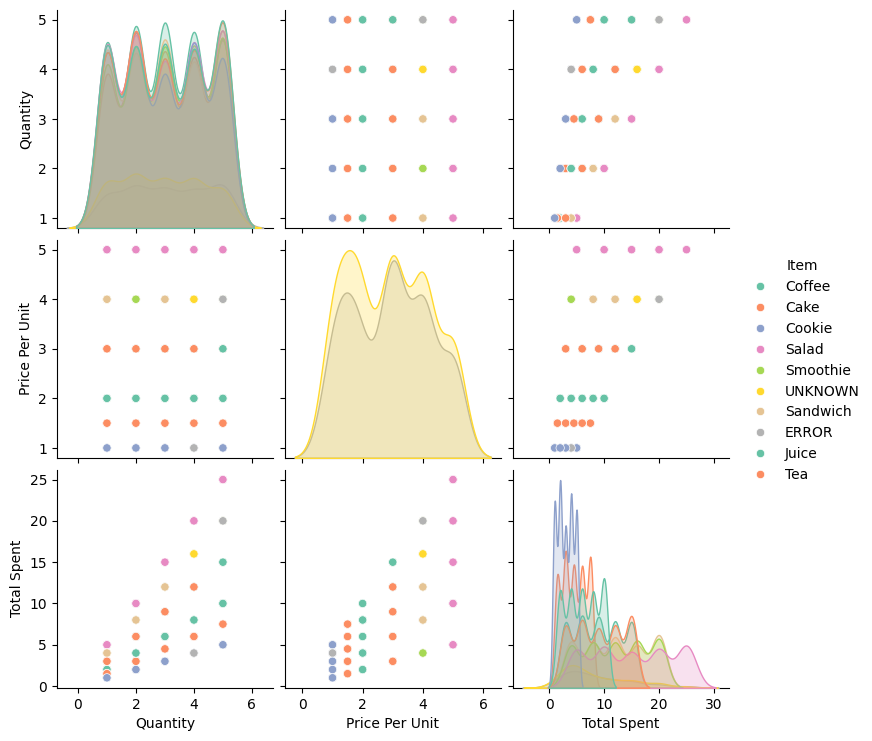

In [ ]:
print("""A partir das correlações abaixo é possível enxergar a existência de erros na base de dados, que serão tratados na etapa seguinte,
também é possível evidenciar que nem todos os itens vendem em maiores quantidades (>4un), então é um ponto para trabalhar.
O total gasto difere conforme os itens, então cookie por exemplo é um item que é válido aumentar o ticket médio.""")

categorical_column = 'Item'
if categorical_column in df.columns:
    sns.pairplot(
        data=df,
        vars=colunas_numericas,
        hue=categorical_column,
        palette='Set2'
    )

## **Como já evideciado nas células acima e agora nos gráficos, há a presença de nulos e erros na base, portanto optei por primeiramente tratar esses casos e posteriormente analisar mais profundamente o negócio.**

# Pré processamento de dados

## Normalizando os nomes das colunas

In [ ]:
#Para facilitar a manipulação e seguir as boas práticas, estou renomeando as colunas para remover espaços e caracteres maiusculos

df = df.rename(columns={'Transaction ID': 'transaction_id', 'Item': 'item', 'Quantity': 'quantity', 'Price Per Unit': 'price_per_unit',
                        'Total Spent': 'total_spent', 'Payment Method': 'payment_method', 'Location': 'location', 'Transaction Date': 'transaction_date'})

## Tratando Nulos

In [ ]:
for x in df.columns:
  print(f"Quantidade de nulos na coluna {x}: {sum(df[x].isna())}")

Quantidade de nulos na coluna transaction_id: 0
Quantidade de nulos na coluna item: 333
Quantidade de nulos na coluna quantity: 479
Quantidade de nulos na coluna price_per_unit: 533
Quantidade de nulos na coluna total_spent: 502
Quantidade de nulos na coluna payment_method: 2579
Quantidade de nulos na coluna location: 3265
Quantidade de nulos na coluna transaction_date: 159


### Tratando nulos da coluna 'price_per_unit'

In [ ]:
for item in df['item'].unique():
  print(f"{item}: {df[df['item'] == item]['price_per_unit'].unique()}")

print("\n Com isso pude concluir que o item tem um preço único por unidade, então posso fazer correlações entre as colunas para preencher casos nan, ERROR ou UNKNOWN na coluna 'price_per_unit' a partir de um dicionário de preços :)")

Coffee: [ 2. nan]
Cake: [ 3. nan]
Cookie: [ 1. nan]
Salad: [ 5. nan]
Smoothie: [ 4. nan]
UNKNOWN: [3.  1.  5.  4.  1.5 2.  nan]
Sandwich: [ 4. nan]
nan: []
ERROR: [1.5 3.  5.  nan 4.  2.  1. ]
Juice: [ 3. nan]
Tea: [1.5 nan]

 Com isso pude concluir que o item tem um preço único por unidade, então posso fazer correlações entre as colunas para preencher casos nan, ERROR ou UNKNOWN na coluna 'price_per_unit' a partir de um dicionário de preços :)


In [ ]:
itens_invalidos = {'ERROR', 'UNKNOWN', np.nan, 'nan'}

precos_por_item = {}

for item in df['item'].unique():
    if item in itens_invalidos or pd.isna(item):
        continue
    precos_validos = df[df['item'] == item]['price_per_unit'].dropna().unique()
    if len(precos_validos) > 0:
        precos_por_item[item] = list(precos_validos)


In [ ]:
precos_por_item

{'Coffee': [np.float64(2.0)],
 'Cake': [np.float64(3.0)],
 'Cookie': [np.float64(1.0)],
 'Salad': [np.float64(5.0)],
 'Smoothie': [np.float64(4.0)],
 'Sandwich': [np.float64(4.0)],
 'Juice': [np.float64(3.0)],
 'Tea': [np.float64(1.5)]}

In [ ]:
# Lista de valores inválidos
valores_invalidos = ['ERROR', 'UNKNOWN', 'nan']

# Função para corrigir os valores
def corrigir_preco(row):
    valor = row['price_per_unit']
    item = row['item']

    if str(valor) in valores_invalidos or pd.isna(valor):
        precos = precos_por_item.get(item, [])
        if len(precos) == 1:
            return precos[0]
        else:
            return np.nan
    return valor

In [ ]:
# Aplica a função à coluna
df['price_per_unit'] = df.apply(corrigir_preco, axis=1)

In [ ]:
print(f"Nulos da coluna 'price_per_unit' restantes: {sum(df['price_per_unit'].isna())}")

Nulos da coluna 'price_per_unit' restantes: 54


In [ ]:
# Lista de valores inválidos
valores_invalidos = ['ERROR', 'UNKNOWN', 'nan']

# Substitui esses valores por np.nan
df['item'] = df['item'].replace(valores_invalidos, np.nan)
df['quantity'] = df['quantity'].replace(valores_invalidos, np.nan)
df['total_spent'] = df['total_spent'].replace(valores_invalidos, np.nan)

In [ ]:
df['price_per_unit'] = df['price_per_unit'].fillna(df['total_spent'] / df['quantity'])

In [ ]:
print(f"Nulos da coluna 'price_per_unit' restantes: {sum(df['price_per_unit'].isna())}")

Nulos da coluna 'price_per_unit' restantes: 6


In [ ]:
print("Tendo em vista que restaram poucos nulos e que faltam muitos dados para poder popular as células (faltam dados de item, preço, quantidade). Optei por dropar as linhas")
df[df['price_per_unit'].isna()]

Tendo em vista que restaram poucos nulos e que faltam muitos dados para poder popular as células (faltam dados de item, preço, quantidade). Optei por dropar as linhas


,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2289,TXN_7524977,NaN,4.0,NaN,NaN,ERROR,NaN,2023-12-09
3779,TXN_7376255,NaN,NaN,NaN,25.0,NaN,In-store,2023-05-27
4152,TXN_9646000,NaN,2.0,NaN,NaN,NaN,In-store,2023-12-14
7597,TXN_1082717,NaN,NaN,NaN,9.0,Digital Wallet,In-store,2023-12-13
9819,TXN_1208561,NaN,NaN,NaN,20.0,Credit Card,NaN,2023-08-19


In [ ]:
df = df.dropna(subset=['price_per_unit']).reset_index(drop=True)

In [ ]:
print(f"Nulos da coluna 'price_per_unit' restantes: {sum(df['price_per_unit'].isna())}")

Nulos da coluna 'price_per_unit' restantes: 0


### Tratando nulos da coluna quantity

In [ ]:
df['quantity'] = df['quantity'].fillna(df['total_spent'] / df['price_per_unit'])

In [ ]:
print(f"Nulos da coluna 'quantity' restantes: {sum(df['quantity'].isna())}")

Nulos da coluna 'quantity' restantes: 20


In [ ]:
print("Sem dados de total gasto não tem como saber a quantidade comprada, portanto irei dropar essas colunas")
df[df['quantity'].isna()]

Sem dados de total gasto não tem como saber a quantidade comprada, portanto irei dropar essas colunas


,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
2794,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3201,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3222,TXN_6297232,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3399,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25
4253,TXN_6470865,Coffee,NaN,2.0,NaN,Digital Wallet,Takeaway,2023-09-18
5837,TXN_5884081,Cookie,NaN,1.0,NaN,Digital Wallet,In-store,2023-07-05


In [ ]:
df = df.dropna(subset=['quantity']).reset_index(drop=True)

In [ ]:
print(f"Nulos da coluna 'quantity' restantes: {sum(df['quantity'].isna())}")

Nulos da coluna 'quantity' restantes: 0


### Tratando nulos da coluna item

In [ ]:
print(f"Nulos da coluna 'item' restantes: {sum(df['item'].isna())}")

Nulos da coluna 'item' restantes: 963


In [ ]:
precos_por_item

{'Coffee': [np.float64(2.0)],
 'Cake': [np.float64(3.0)],
 'Cookie': [np.float64(1.0)],
 'Salad': [np.float64(5.0)],
 'Smoothie': [np.float64(4.0)],
 'Sandwich': [np.float64(4.0)],
 'Juice': [np.float64(3.0)],
 'Tea': [np.float64(1.5)]}

In [ ]:
from collections import defaultdict

# Mapeia preços para os itens que os possuem
preco_para_itens = defaultdict(list)

for item, precos in precos_por_item.items():
    for preco in precos:
        preco_para_itens[preco].append(item)

# Agora cria o dicionário final apenas com preços que aparecem em 1 item
preco_unico_para_item = {
    preco: itens[0]
    for preco, itens in preco_para_itens.items()
    if len(itens) == 1
}


In [ ]:
preco_unico_para_item

{np.float64(2.0): 'Coffee',
 np.float64(1.0): 'Cookie',
 np.float64(5.0): 'Salad',
 np.float64(1.5): 'Tea'}

In [ ]:
# Preenche valores ausentes na coluna 'item' com base no preço (se possível)
df['item'] = df.apply(
    lambda row: preco_unico_para_item.get(row['price_per_unit'], row['item']),
    axis=1
)


In [ ]:
print(f"Nulos da coluna 'item' restantes: {sum(df['item'].isna())}")
print("Como possuem alguns itens com preços repetidos, acabou que ficaram nulos ainda na tabela. \n Por enquanto irei mante-los pois pode ser que não seja necessário ter essa informação para o futuro. Apenas irei preencher os nulos com alguma informação")

Nulos da coluna 'item' restantes: 474
Como possuem alguns itens com preços repetidos, acabou que ficaram nulos ainda na tabela. 
 Por enquanto irei mante-los pois pode ser que não seja necessário ter essa informação para o futuro. Apenas irei preencher os nulos com alguma informação


In [ ]:
df['item'] = df['item'].fillna("not specified")

In [ ]:
print(f"Nulos da coluna 'item' restantes: {sum(df['item'].isna())}")

Nulos da coluna 'item' restantes: 0


### Tratamento dos nulos da coluna total_spent

In [ ]:
print(f"Nulos da coluna 'total_spent' restantes: {sum(df['total_spent'].isna())}")

Nulos da coluna 'total_spent' restantes: 479


In [ ]:
df['total_spent'] = df['total_spent'].fillna(df['quantity'] * df['price_per_unit'])

In [ ]:
print(f"Nulos da coluna 'total_spent' restantes: {sum(df['total_spent'].isna())}")

Nulos da coluna 'total_spent' restantes: 0


### Tratamento dos nulos da coluna payment_method e location


In [ ]:
# Lista de valores inválidos
valores_invalidos = ['ERROR', 'UNKNOWN', 'nan']

# Substitui esses valores por np.nan
df['payment_method'] = df['payment_method'].replace(valores_invalidos, np.nan)
df['location'] = df['location'].replace(valores_invalidos, np.nan)

In [ ]:
df['payment_method'] = df['payment_method'].fillna('not specified')
df['location'] = df['location'].fillna('not specified')

In [ ]:
print(f"Nulos da coluna 'payment_method' restantes: {sum(df['payment_method'].isna())}")
print(f"Nulos da coluna 'location' restantes: {sum(df['location'].isna())}")

Nulos da coluna 'payment_method' restantes: 0
Nulos da coluna 'location' restantes: 0


### Tratamento dos nulos da coluna transaction_date

In [ ]:
print(f"Nulos da coluna 'transaction_date' restantes: {sum(df['transaction_date'].isna())}")

Nulos da coluna 'transaction_date' restantes: 159


In [ ]:
df['transaction_date'] = df['transaction_date'].replace(valores_invalidos, np.nan)
print(f"Nulos da coluna 'transaction_date' restantes: {sum(df['transaction_date'].isna())}")

Nulos da coluna 'transaction_date' restantes: 460


Como a coluna de data possui valores nulos e também não é possível descobrir as datas a partir de outras colunas, irei remove-las do dataset pois para qualquer análise ou até mesmo predição que envolva série temporal, terei problema com esses dados nulos.

In [ ]:
df = df.dropna(subset=['transaction_date']).reset_index(drop=True)

### Check se ainda existem nulos

In [ ]:
print(f"Instâncias restantes: {len(df)} linhas, restaram {len(df)*100/len(df_original)}% dos dados.")
print("---------------------------------")

for x in df.columns:
  print(f"Quantidade de nulos na coluna {x}: {sum(df[x].isna())}")

Instâncias restantes: 9514 linhas, restaram 95.14% dos dados.
---------------------------------
Quantidade de nulos na coluna transaction_id: 0
Quantidade de nulos na coluna item: 0
Quantidade de nulos na coluna quantity: 0
Quantidade de nulos na coluna price_per_unit: 0
Quantidade de nulos na coluna total_spent: 0
Quantidade de nulos na coluna payment_method: 0
Quantidade de nulos na coluna location: 0
Quantidade de nulos na coluna transaction_date: 0


In [ ]:
len(df)

9514

## Novas features

Foi aplicado one-hot encoder e as novas features para ter mais variáveis para correlacionar e até mesmo aplicar no modelo de previsão de demanda

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['ano'] = df['transaction_date'].dt.year
df['mes'] = df['transaction_date'].dt.month
df['dia'] = df['transaction_date'].dt.day
df['dia_da_semana'] = df['transaction_date'].dt.dayofweek  # 0=Segunda, 6=Domingo
df['semana_do_ano'] = df['transaction_date'].dt.isocalendar().week
df['trimestre'] = df['transaction_date'].dt.quarter
df['final_de_semana'] = df['dia_da_semana'].isin([5, 6]).astype(int)
df['dia_util'] = (~df['final_de_semana'].astype(bool)).astype(int)

## Distribuição

Inseri a distribuição neste ponto para avaliar após o tratamento dos nulos e erros visto que era uma quantidade considerável

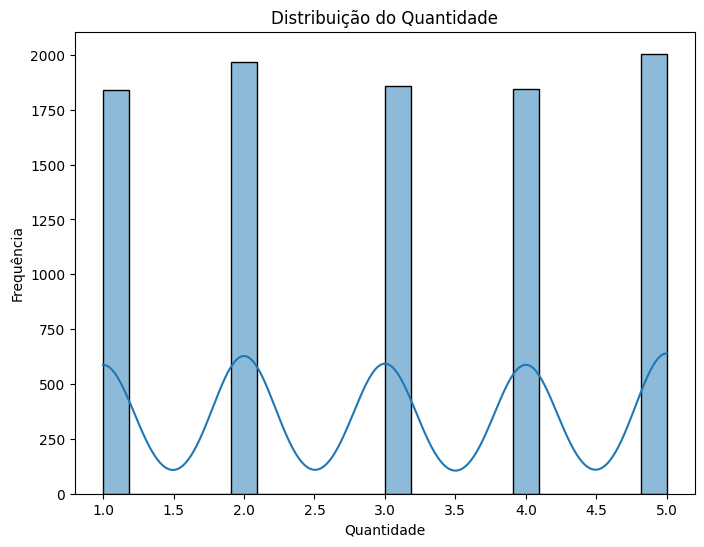

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['quantity'], kde=True)
plt.title('Distribuição do Quantidade')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

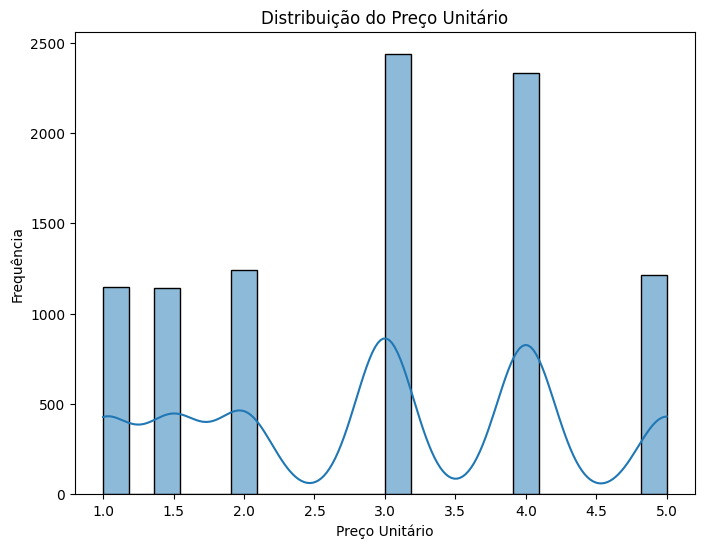

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price_per_unit'], kde=True)
plt.title('Distribuição do Preço Unitário')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.show()

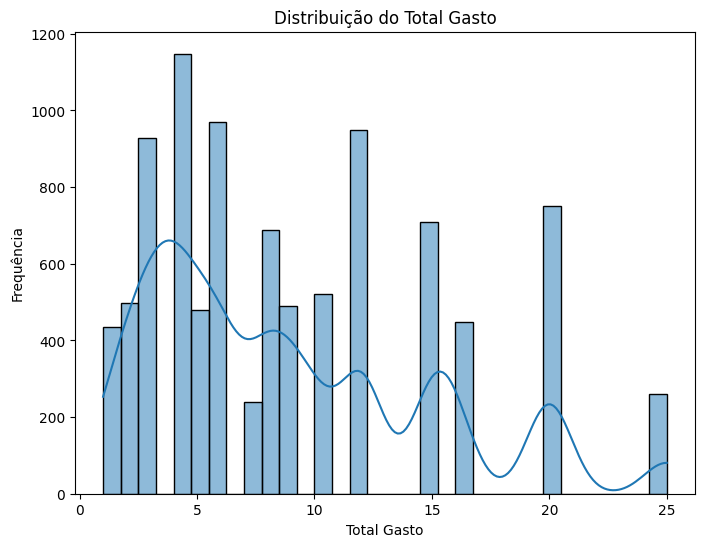

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_spent'], kde=True)
plt.title('Distribuição do Total Gasto')
plt.xlabel('Total Gasto')
plt.ylabel('Frequência')
plt.show()

## One-hot encoder

In [ ]:
# Selecionando apenas as colunas categóricas
categorical_cols = ['payment_method', 'location']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' para evitar multicolinearidade

# Aplicando o encoding
encoded_data = encoder.fit_transform(df[categorical_cols])

# Criando um DataFrame com as colunas codificadas
df_intermediario = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenando com as colunas numéricas originais
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), df_intermediario], axis=1)

In [ ]:
df_encoded.head()

,transaction_id,item,quantity,price_per_unit,total_spent,transaction_date,ano,mes,dia,dia_da_semana,semana_do_ano,trimestre,final_de_semana,dia_util,payment_method_Credit Card,payment_method_Digital Wallet,payment_method_not specified,location_Takeaway,location_not specified
0,TXN_1961373,Coffee,2.0,2.0,4.0,2023-09-08,2023,9,8,4,36,3,0,1,1.0,0.0,0.0,1.0,0.0
1,TXN_4977031,Cake,4.0,3.0,12.0,2023-05-16,2023,5,16,1,20,2,0,1,0.0,0.0,0.0,0.0,0.0
2,TXN_4271903,Cookie,4.0,1.0,4.0,2023-07-19,2023,7,19,2,29,3,0,1,1.0,0.0,0.0,0.0,0.0
3,TXN_7034554,Salad,2.0,5.0,10.0,2023-04-27,2023,4,27,3,17,2,0,1,0.0,0.0,1.0,0.0,1.0
4,TXN_3160411,Coffee,2.0,2.0,4.0,2023-06-11,2023,6,11,6,23,2,1,0,0.0,1.0,0.0,0.0,0.0


## Split de treino e teste com normalização & Definição se é possível prever a demanda

In [ ]:
df_encoded['transaction_date'] = pd.to_datetime(df_encoded['transaction_date'])
df_encoded = df_encoded.sort_values(by='transaction_date')

### É possível prever a demanda?

É possível prever a demanda da cafeteria como um todo, sem especificar o produto, mas acredito que seja de mais valor entregar uma previsão de demanda para cada produto, portanto nessa sessão estão algumas visualizações das séries temporais a título exploratório.

Avaliando a série temporal de cada produto posso dizer que dá para prever a demanda individual, para isso será necessário dividir um dataset para cada um e agrupar por dia, somando as quantidades.

Optei por manter essa análise aqui pois ela faz sentido estar nessa etapa do processo, ainda mais que as visualizações não retornam insights para o negócio, mas sim para o desenvolvimento em si.

In [ ]:
def serie_temporal(df):
    # Configuração inicial do gráfico
    plt.figure(figsize=(12, 6))

    # Converter o índice para datetime se necessário
    if not isinstance(df.index, pd.DatetimeIndex):
        try:
            df.index = pd.to_datetime(df.index)
        except:
            pass  # Se não for possível converter, mantém como está

    # Plotar os dados
    plt.plot(df.index, df['quantity'])
    plt.title("Série temporal de vendas da cafeteria")
    plt.xlabel('Data', fontsize=8)
    plt.ylabel('Quantidade vendida', fontsize=8)

    # Gerar 12 ticks equidistantes
    if len(df) > 0:
        # Método 1: Para índices datetime
        if isinstance(df.index, pd.DatetimeIndex):
            # Seleciona 12 meses equidistantes
            ticks = pd.date_range(start=df.index.min(), end=df.index.max(), periods=12)
            plt.xticks(ticks, [t.strftime('%d/%m/%Y') for t in ticks], rotation=45, fontsize=8)

        # Método 2: Para outros tipos de índice
        else:
            step = max(1, len(df) // 12)
            positions = range(0, len(df), step)[:12]  # Garante no máximo 12 ticks
            plt.xticks(positions, [str(df.index[i]) for i in positions], rotation=45, fontsize=8)

    plt.tight_layout()
    return plt.show()

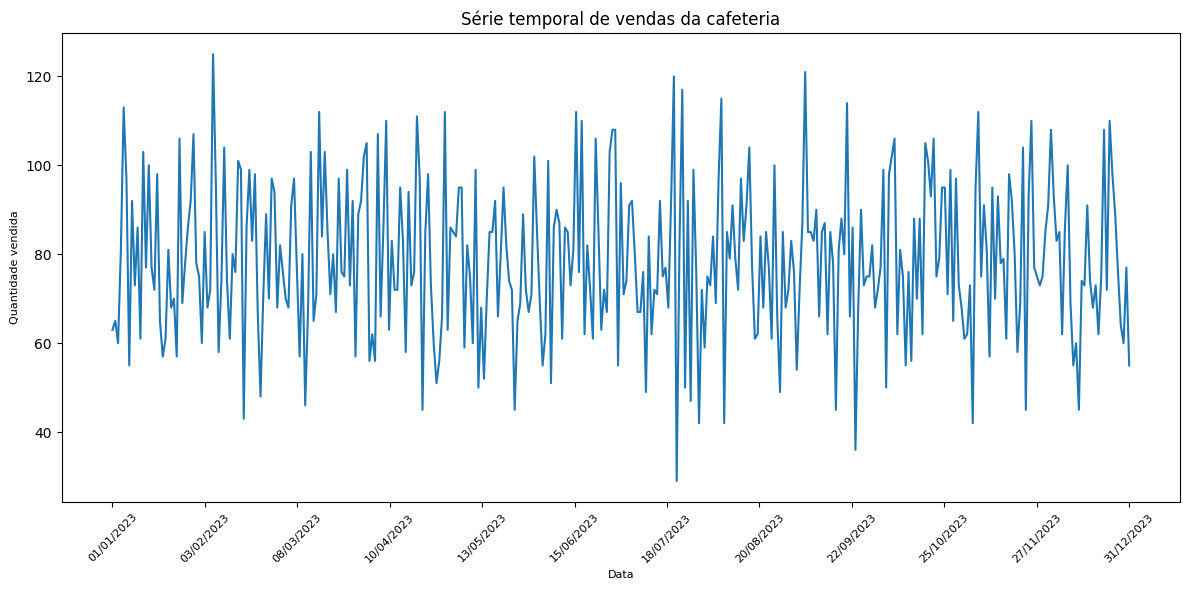

In [ ]:
df_previsao = df.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

# Se seu DataFrame ainda não tiver o índice como datetime
df_previsao.index = pd.to_datetime(df_previsao.index)

serie_temporal(df_previsao)

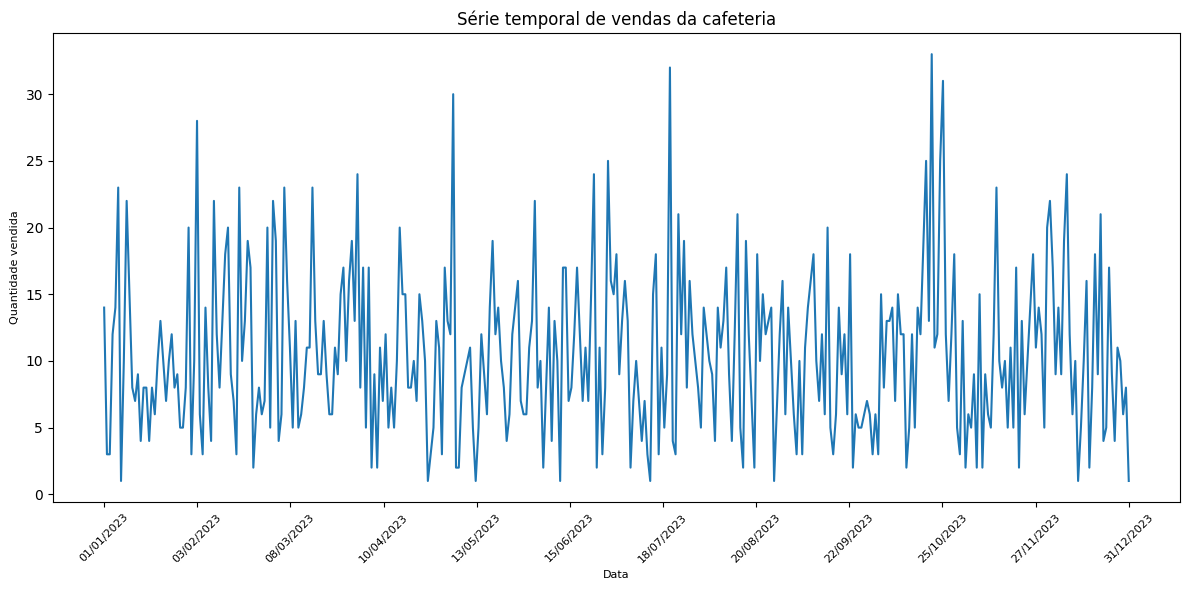

In [ ]:
df_previsao_cafe = df[df['item'] == 'Coffee']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

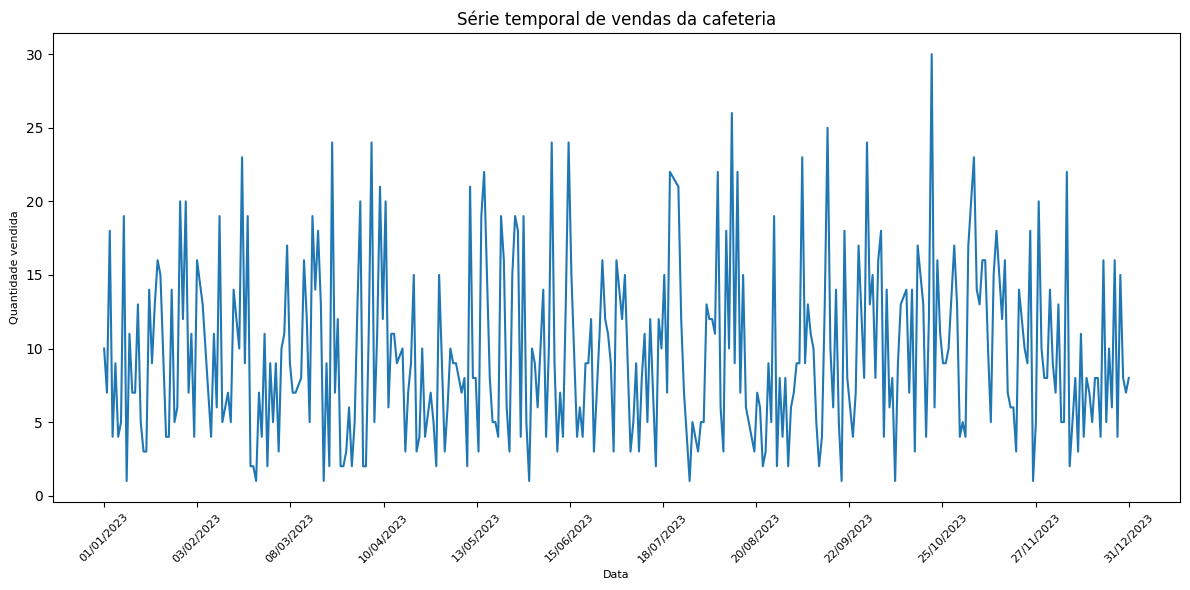

In [ ]:
df_previsao_cafe = df[df['item'] == 'Cake']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

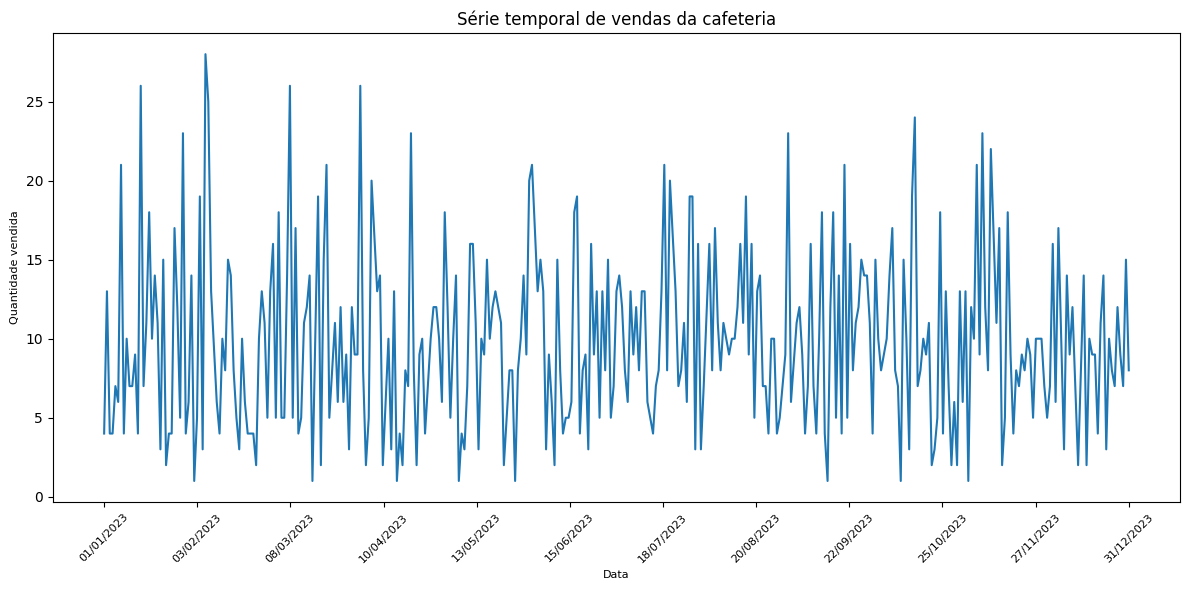

In [ ]:
df_previsao_cafe = df[df['item'] == 'Cookie']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

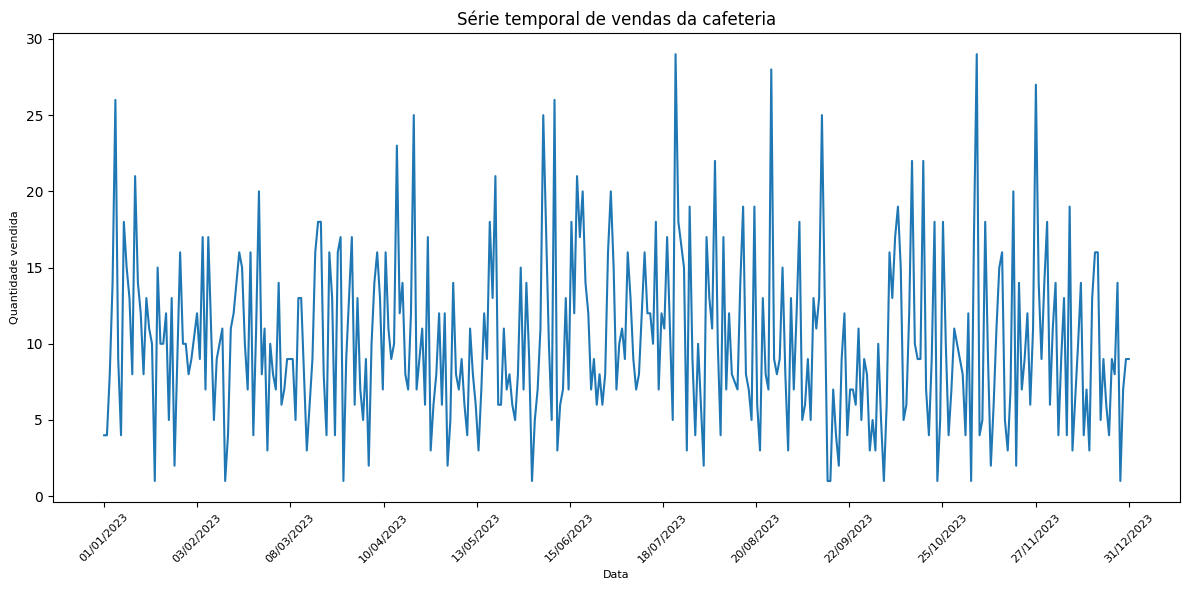

In [ ]:
df_previsao_cafe = df[df['item'] == 'Salad']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

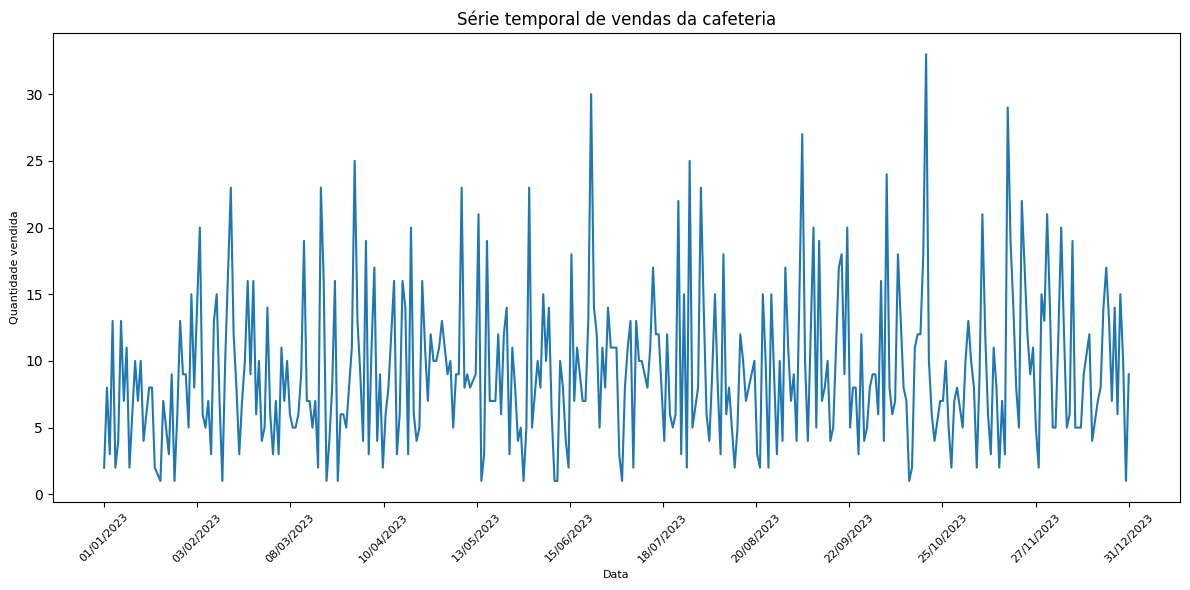

In [ ]:
df_previsao_cafe = df[df['item'] == 'Smoothie']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

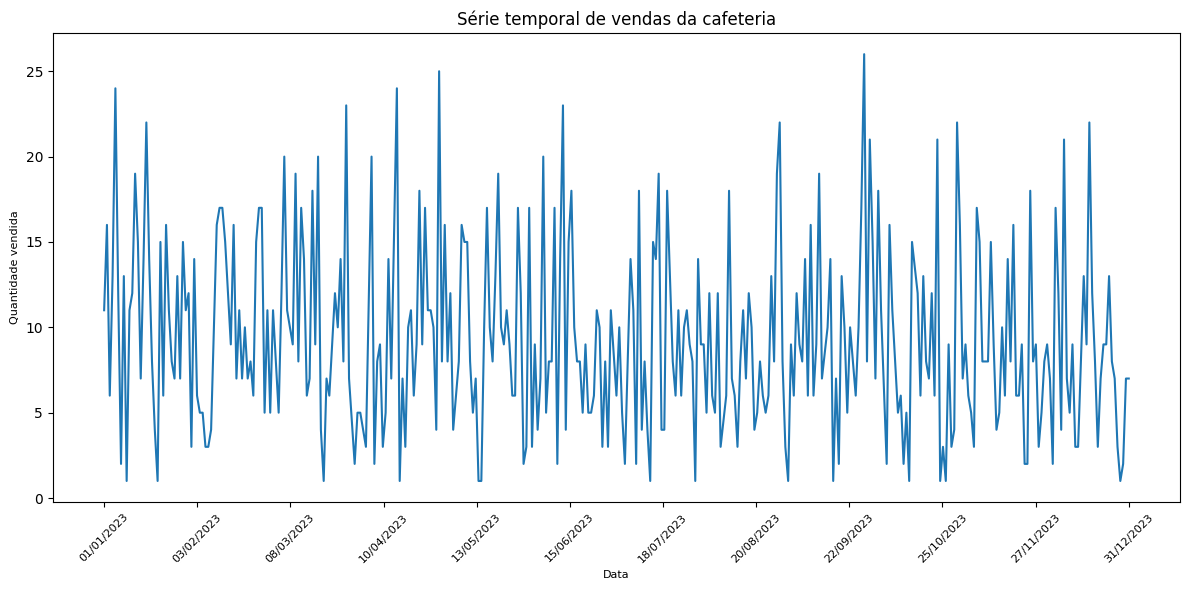

In [ ]:
df_previsao_cafe = df[df['item'] == 'Sandwich']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

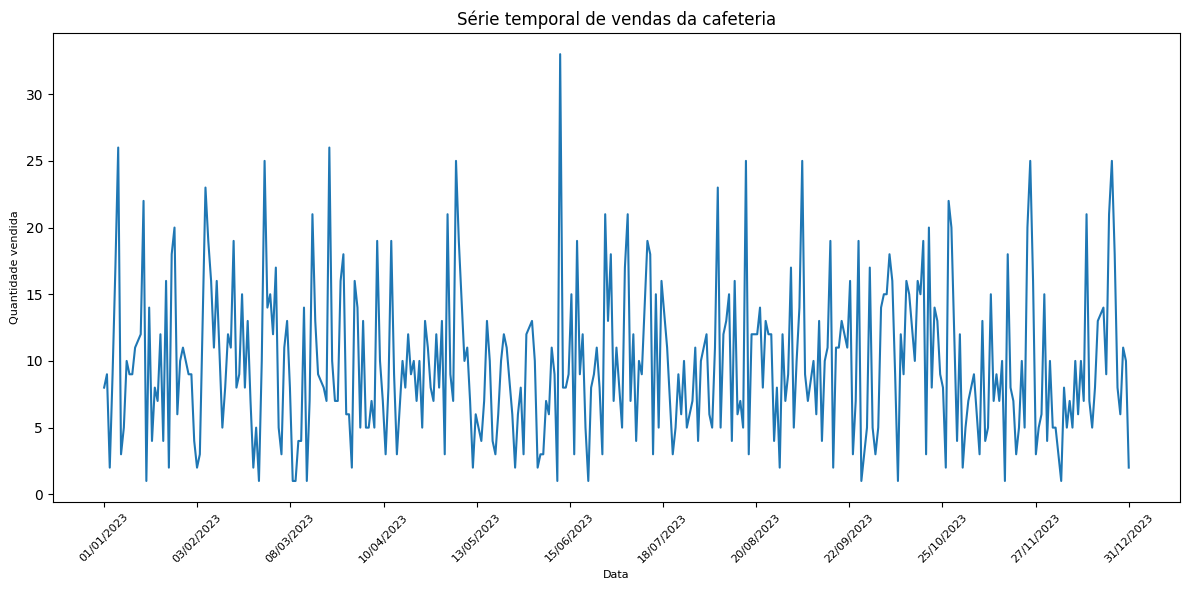

In [ ]:
df_previsao_cafe = df[df['item'] == 'Tea']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

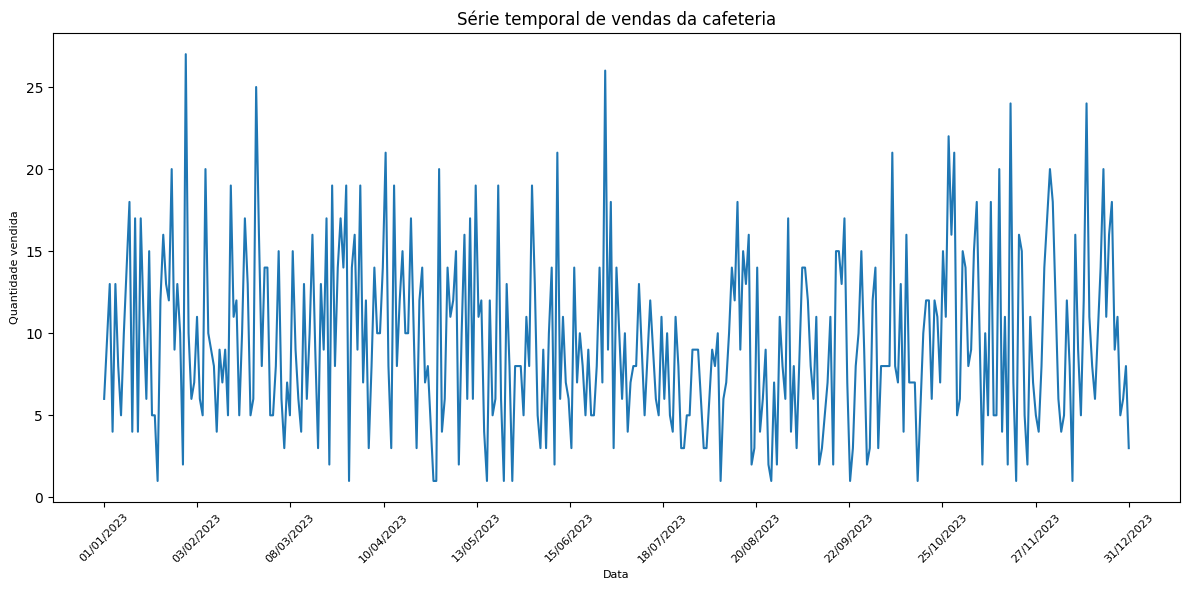

In [ ]:
df_previsao_cafe = df[df['item'] == 'Juice']
df_previsao_cafe = df_previsao_cafe.groupby(by='transaction_date').agg({
    'quantity': 'sum',
    'total_spent': 'sum'})

serie_temporal(df_previsao_cafe)

In [ ]:
print(f"{len(df[df['item'] == 'not specified'])} linhas precisarão ser excluídas do dataset")

450 linhas precisarão ser excluídas do dataset


## Criação dos datasets necessários e splits em treino e teste

Preparando os dados para aplicação do modelo. Como estamos trabalhando com uma série temporal, precisamos aplicar  o método TimeSeriesSplit pois a ordem dos registros importa

In [ ]:
df_encoded = df_encoded[df_encoded['item'] != 'not specified']
df_encoded = df_encoded[df_encoded['transaction_id'].notna()]

In [ ]:
# Inicializar o MinMaxScaler para normalização
scaler_norm = MinMaxScaler()

In [ ]:
n_splits = 3

features_df = df_encoded[['item', 'quantity', 'price_per_unit', 'total_spent',
       'transaction_date', 'ano', 'mes', 'dia',
       'dia_da_semana', 'semana_do_ano', 'trimestre', 'final_de_semana',
       'dia_util', 'payment_method_Credit Card', 'payment_method_Digital Wallet',
       'payment_method_not specified', 'location_Takeaway',
       'location_not specified']]

for item in features_df['item'].unique():
    df_item = features_df[features_df['item'] == item].sort_values('transaction_date').reset_index(drop=True)
    df_item = df_item.drop(columns=['item', 'transaction_date'])

    tscv = TimeSeriesSplit(n_splits=n_splits)

    print(f"\nItem: {item}")
    for fold, (train_idx, test_idx) in enumerate(tscv.split(df_item)):
        train = df_item.iloc[train_idx]
        test = df_item.iloc[test_idx]

        # Aprende min e max APENAS de X_train
        scaler_norm.fit(train)
        train_normalized = scaler_norm.transform(train)
        # Usa a média e o desvio padrão aprendidos de X_train
        test_normalized = scaler_norm.transform(test)

        print(f"Fold {fold + 1}:")
        print(f"Tamanho: {len(train)}")
        print(f"Tamanho: {len(test)}")

        # df_normalized = pd.DataFrame(train_normalized, columns=train.columns)
        # Próximos passos dentro do loop seria o treino e aplicação do modelo



Item: Coffee
Fold 1:
Tamanho: 311
Tamanho: 310
Fold 2:
Tamanho: 621
Tamanho: 310
Fold 3:
Tamanho: 931
Tamanho: 310

Item: Cake
Fold 1:
Tamanho: 271
Tamanho: 270
Fold 2:
Tamanho: 541
Tamanho: 270
Fold 3:
Tamanho: 811
Tamanho: 270

Item: Sandwich
Fold 1:
Tamanho: 270
Tamanho: 267
Fold 2:
Tamanho: 537
Tamanho: 267
Fold 3:
Tamanho: 804
Tamanho: 267

Item: Smoothie
Fold 1:
Tamanho: 263
Tamanho: 261
Fold 2:
Tamanho: 524
Tamanho: 261
Fold 3:
Tamanho: 785
Tamanho: 261

Item: Juice
Fold 1:
Tamanho: 281
Tamanho: 280
Fold 2:
Tamanho: 561
Tamanho: 280
Fold 3:
Tamanho: 841
Tamanho: 280

Item: Salad
Fold 1:
Tamanho: 305
Tamanho: 303
Fold 2:
Tamanho: 608
Tamanho: 303
Fold 3:
Tamanho: 911
Tamanho: 303

Item: Cookie
Fold 1:
Tamanho: 288
Tamanho: 287
Fold 2:
Tamanho: 575
Tamanho: 287
Fold 3:
Tamanho: 862
Tamanho: 287

Item: Tea
Fold 1:
Tamanho: 286
Tamanho: 285
Fold 2:
Tamanho: 571
Tamanho: 285
Fold 3:
Tamanho: 856
Tamanho: 285


# Análise do Negócio

Após realizar todo o tratamento de nulos e erros, agora sim fica mais assertiva a análise de dados, resposta das hipóteses e também insights para o negócio em si.

In [ ]:
print(f"Representatividade de localização da compra:")
localizacao = df['location'].unique()
total = len(df)
for loc in localizacao:
  total_loc = len(df[df['location'] == loc])
  print(f"{round((total_loc * 100)/total, 2)}% representam a localização {loc}")

print("\nPortanto, a hipótese de pelo menos 50% das vendas serem feitas presencial na loja está errada,\nmuito pelo fato de termos uma quantidade consideravel de vendas não especificadas")

Representatividade de localização da compra:
30.3% representam a localização Takeaway
30.07% representam a localização In-store
39.63% representam a localização not specified

Portanto, a hipótese de pelo menos 50% das vendas serem feitas presencial na loja está errada,
muito pelo fato de termos uma quantidade consideravel de vendas não especificadas


In [ ]:
# lista de itens que são bebidas
bebidas = ['Coffee', 'Smoothie', 'Tea', 'Juice']

# cria a nova coluna 'tipo_item'
df['tipo_item'] = np.where(df['item'].isin(bebidas), 'bebida', 'lanche')

In [ ]:
df_tipoitem = df.groupby('tipo_item')['quantity'].sum()

print(f"{round((df_tipoitem.iloc[0] * 100)/df_tipoitem.sum(), 2)}% representam quantidade de venda de {df_tipoitem.index[0]}")
print(f"{round((df_tipoitem.iloc[1] * 100)/df_tipoitem.sum(), 2)}% representam quantidade de venda de {df_tipoitem.index[1]}")
print("A hipótese de ter mais vendas de bebida está correta, apesar de ser extremamente próximo a quantidade de venda de lanche")

47.81% representam quantidade de venda de bebida
52.19% representam quantidade de venda de lanche
A hipótese de ter mais vendas de bebida está correta, apesar de ser extremamente próximo a quantidade de venda de lanche


In [ ]:
df_gasto = df.groupby('tipo_item')['total_spent'].sum()

print(f"{round((df_gasto.iloc[0] * 100)/df_gasto.sum(), 2)}% representam valor de venda de {df_gasto.index[0]}")
print(f"{round((df_gasto.iloc[1] * 100)/df_gasto.sum(), 2)}% representam valor de venda de {df_gasto.index[1]}")
print("Já olhando para as vendas em relação ao quanto está sendo vendido, vemos que os lanches rendem mais para o negócio")

41.82% representam valor de venda de bebida
58.18% representam valor de venda de lanche
Já olhando para as vendas em relação ao quanto está sendo vendido, vemos que os lanches rendem mais para o negócio


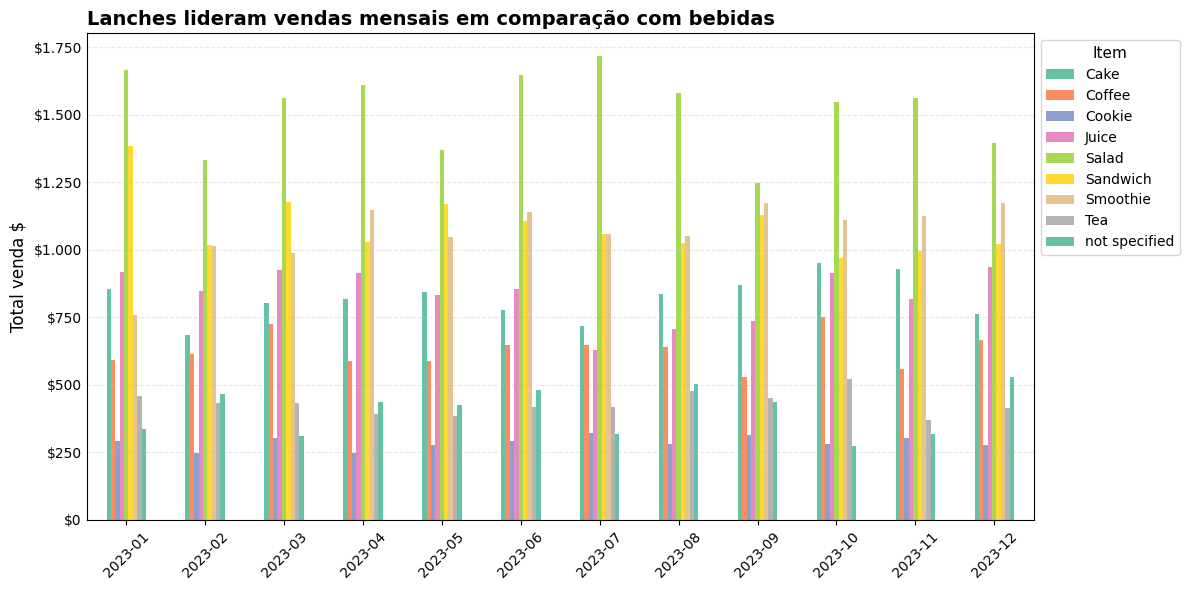

In [ ]:
# 1. Converter para datetime, se ainda não for
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# 2. Criar coluna com o ano-mês
df['ano_mes'] = df['transaction_date'].dt.to_period('M').astype(str)

# 3. Agrupar por mês e item, somando total_spent
gasto_mensal = df.groupby(['ano_mes', 'item'])['total_spent'].sum().reset_index()

# 4. Pivotar para que item vire colunas
gasto_pivot = gasto_mensal.pivot(index='ano_mes', columns='item', values='total_spent').fillna(0)

# 5. Plotar gráfico de barras com estilo storytelling
fig, ax = plt.subplots(figsize=(12, 6))

# Escolher paleta de cores suaves
cores = plt.cm.Set2.colors[:len(gasto_pivot.columns)]

gasto_pivot.plot(kind='bar', ax=ax, color=cores)

# 6. Título informativo e direto
ax.set_title('Lanches lideram vendas mensais em comparação com bebidas', fontsize=14, weight='bold', loc='left')

# 7. Eixos claros
ax.set_xlabel('')
ax.set_ylabel('Total venda $', fontsize=12)
ax.yaxis.set_major_formatter(lambda x, _: f'${x:,.0f}'.replace(',', '.'))

# 8. Rótulos limpos
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', which='both', length=0)  # sem "ticks" verticais

# 9. Remover grade desnecessária
ax.grid(axis='x', visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# 10. Legenda
ax.legend(title='Item', title_fontsize=11, fontsize=10, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


Neste gráfico de barras podemos ver que os lanches lideram as vendas todos os meses. Destaque para salada, sanduíche e smoothie. Enquanto bebidas tem uma venda bem menos significativa em valores.

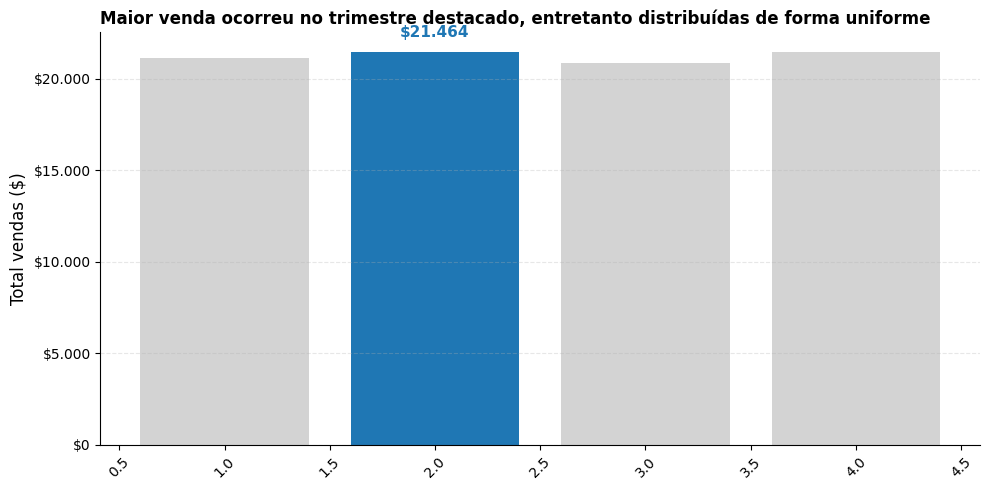

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Converter para datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# 3. Agrupar por trimestre e somar total_spent
gasto_trimestral = df.groupby('trimestre')['total_spent'].sum().reset_index()

# 4. Plotar com estilo storytelling
fig, ax = plt.subplots(figsize=(10, 5))

# Cores: cinza claro para todos os trimestres, azul mais forte para o maior valor (destaque)
cores = ['#d3d3d3'] * len(gasto_trimestral)
max_index = gasto_trimestral['total_spent'].idxmax()
cores[max_index] = '#1f77b4'  # azul padrão

# Gráfico de barras
ax.bar(gasto_trimestral['trimestre'], gasto_trimestral['total_spent'], color=cores)

# 5. Título que comunica o insight
ax.set_title('Maior venda ocorreu no trimestre destacado, entretanto distribuídas de forma uniforme', fontsize=12, loc='left', weight='bold')

# 6. Rótulos limpos
ax.set_xlabel('')
ax.set_ylabel('Total vendas ($)', fontsize=12)
ax.yaxis.set_major_formatter(lambda x, _: f'${x:,.0f}'.replace(',', '.'))
ax.tick_params(axis='x', rotation=45)

# 7. Remover linhas de grade des
ax.grid(axis='x', visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

# 8. Anotar o trimestre com maior valor (opcional)
max_valor = gasto_trimestral.loc[max_index, 'total_spent']
max_trimestre = gasto_trimestral.loc[max_index, 'trimestre']
ax.text(
    gasto_trimestral.loc[max_index, 'trimestre'],  # Corrige a posição no eixo X
    max_valor + max_valor * 0.03,
    f'${max_valor:,.0f}'.replace(',', '.'),
    ha='center', va='bottom', fontsize=11, weight='bold', color='#1f77b4'
)

plt.tight_layout()
plt.show()

Avaliando o trimestre temos um destaque para o segundo trimestre, entretanto possuem uma distribuição bem similar, não levando a insights relevantes de melhoria no processo, mas mostrando que o café vende de uma forma uniforme durante o ano

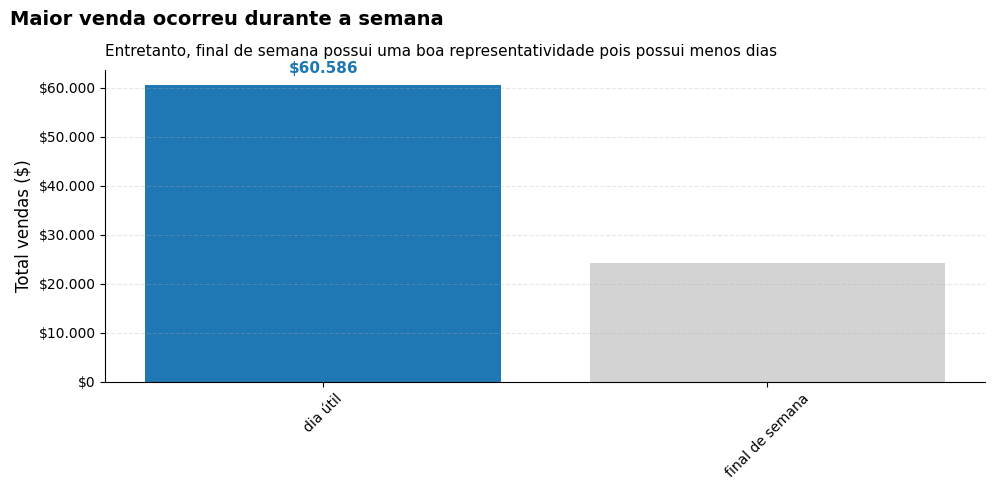

In [ ]:
# 1. Converter para datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['final_de_semana_str'] = np.where(df['final_de_semana'] == 0, 'dia útil', 'final de semana')


# 3. Agrupar por trimestre e somar total_spent
gasto_trimestral = df.groupby('final_de_semana_str')['total_spent'].sum().reset_index()

# 4. Plotar com estilo storytelling
fig, ax = plt.subplots(figsize=(10, 5))

# Cores: cinza claro para todos os trimestres, azul mais forte para o maior valor (destaque)
cores = ['#d3d3d3'] * len(gasto_trimestral)
max_index = gasto_trimestral['total_spent'].idxmax()
cores[max_index] = '#1f77b4'  # azul padrão

# Gráfico de barras
ax.bar(gasto_trimestral['final_de_semana_str'], gasto_trimestral['total_spent'], color=cores)

# 5. Título que comunica o insight
# Título principal com mais espaçamento vertical
fig.suptitle(
    'Maior venda ocorreu durante a semana',
    fontsize=14,
    fontweight='bold',
    x=0.01,  # alinha mais à esquerda
    ha='left',
    y=0.97   # sobe o título
)

# Subtítulo
ax.set_title(
    'Entretanto, final de semana possui uma boa representatividade pois possui menos dias',
    fontsize=11,
    loc='left',
    pad=10,  # espaço entre subtítulo e gráfico
)

# 6. Rótulos limpos
ax.set_xlabel('')
ax.set_ylabel('Total vendas ($)', fontsize=12)
ax.yaxis.set_major_formatter(lambda x, _: f'${x:,.0f}'.replace(',', '.'))
ax.tick_params(axis='x', rotation=45)

# 7. Remover linhas de grade des
ax.grid(axis='x', visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines[['top', 'right']].set_visible(False)

# 8. Anotar o trimestre com maior valor (opcional)
max_valor = gasto_trimestral.loc[max_index, 'total_spent']
max_trimestre = gasto_trimestral.loc[max_index, 'final_de_semana_str']
ax.text(
    gasto_trimestral.loc[max_index, 'final_de_semana_str'],  # Corrige a posição no eixo X
    max_valor + max_valor * 0.03,
    f'${max_valor:,.0f}'.replace(',', '.'),
    ha='center', va='bottom', fontsize=11, weight='bold', color='#1f77b4'
)

plt.tight_layout()
plt.show()

Dias úteis, segunda a sexta feira, o café vende mais, mas é um resultado esperado tendo em vista que são mais dias. Porém o final de semana tem uma representação interessante tendo em vista que são somente dois dias.

Média do total de vendas 7072.375


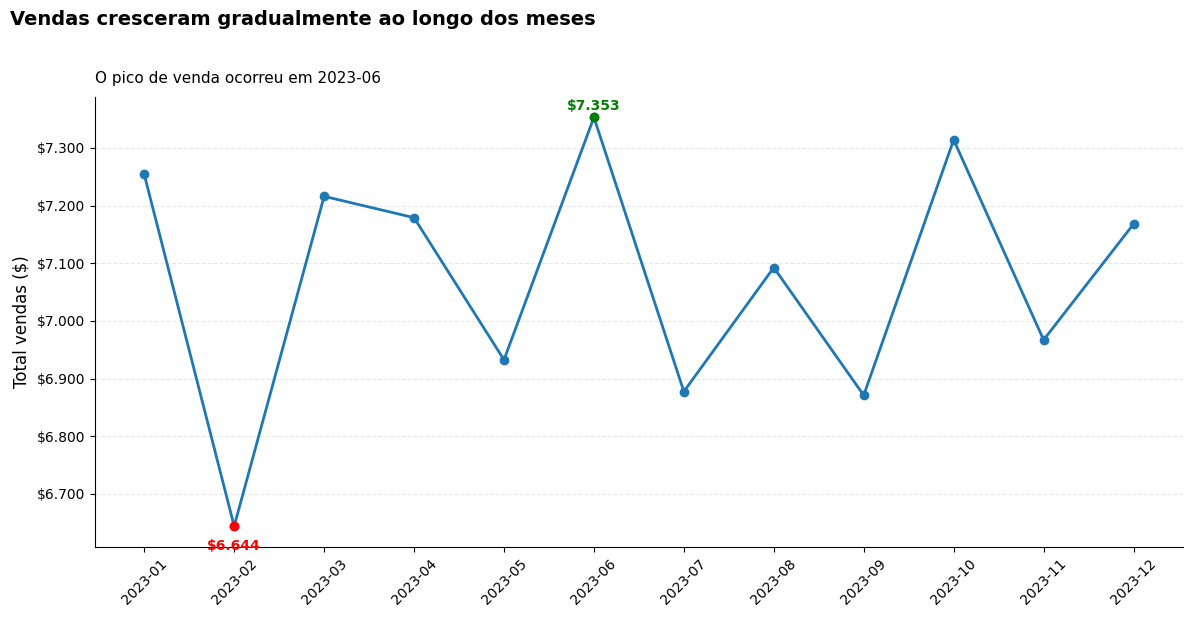

In [ ]:
print(f"Média do total de vendas {np.mean(df.groupby('ano_mes')['total_spent'].sum())}")
# 3. Agrupar por ano_mes e somar total_spent
gasto_mensal = df.groupby('ano_mes')['total_spent'].sum().reset_index()

# 4. Gráfico de linha com estilo Storytelling
fig, ax = plt.subplots(figsize=(12, 6))

# Linha com cor neutra
ax.plot(gasto_mensal['ano_mes'], gasto_mensal['total_spent'], color='#1f77b4', linewidth=2, marker='o')

# Destaque no ponto de maior gasto
max_idx = gasto_mensal['total_spent'].idxmax()
max_ano_mes = gasto_mensal.loc[max_idx, 'ano_mes']
max_valor = gasto_mensal.loc[max_idx, 'total_spent']
ax.plot(max_ano_mes, max_valor, 'o', color='green')
ax.text(max_ano_mes, max_valor * 1.001, f'${max_valor:,.0f}'.replace(',', '.'),
        ha='center', va='bottom', fontsize=10, weight='bold', color='green')

# Destaque no ponto de menor gasto
min_idx = gasto_mensal['total_spent'].idxmin()
min_ano_mes = gasto_mensal.loc[min_idx, 'ano_mes']
min_valor = gasto_mensal.loc[min_idx, 'total_spent']
ax.plot(min_ano_mes, min_valor, 'o', color='red')
ax.text(min_ano_mes, min_valor * 0.993, f'${min_valor:,.0f}'.replace(',', '.'),
        ha='center', va='bottom', fontsize=10, weight='bold', color='red')

# Título e subtítulo
fig.suptitle('Vendas cresceram gradualmente ao longo dos meses', fontsize=14, weight='bold', x=0.01, ha='left', y=1.02)
ax.set_title('O pico de venda ocorreu em ' + max_ano_mes, fontsize=11, loc='left', pad=10)

# Eixos
ax.set_xlabel('')
ax.set_ylabel('Total vendas ($)', fontsize=12)
ax.yaxis.set_major_formatter(lambda x, _: f'${x:,.0f}'.replace(',', '.'))

# Estética limpa
ax.tick_params(axis='x', rotation=45)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


Este gráfico das vendas mensais é interessante pois vemos um vale que diminui em torno de 500 reais da média do período todo. A distribuição é similar com a média no decorrer do ano, mas ainda assim possuem meses abaixo e acima.